In [1]:
!pip install "deeplake<4"

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import deeplake
import pandas as pd

/home/fhy9gs/.local/lib/python3.11/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.0.2) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [3]:
# Open the dataset in read-only mode
ds = deeplake.load('hub://activeloop/wiki-art')

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/wiki-art



/

hub://activeloop/wiki-art loaded successfully.



In [4]:
ds.visualize()

HINT: Please forward the port - 53485 to your local machine, if you are running on the cloud.
 * Serving Flask app 'dataset_visualizer'


 * Debug mode: off


Skipping corrupted or unreadable image.


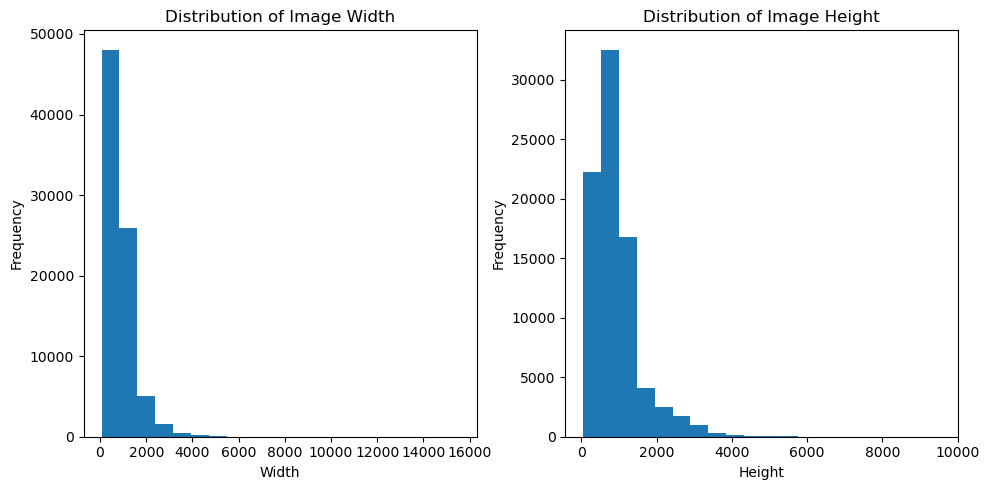

In [5]:
from deeplake.core.chunk_engine import ReadSampleFromChunkError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None  # Remove image pixel limit

import matplotlib.pyplot as plt
import numpy as np

# Example: Histogram of image sizes
if 'images' in ds.tensors:
    width = []
    height = []
    for sample in ds:
        try:
            img = sample['images'].numpy()
            width.append(img.shape[1])
            height.append(img.shape[0])
        except (OSError, ReadSampleFromChunkError):  # Catch OSError and ReadSampleFromChunkError
            print("Skipping corrupted or unreadable image.")
    
    # Plotting the distributions
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(width, bins=20)
    plt.title('Distribution of Image Width')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(height, bins=20)
    plt.title('Distribution of Image Height')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [1]:
import pandas as pd
labels = {
    'Art Style': ['Ukiyo-e', 'Synthetic Cubism', 'Symbolism', 'Romanticism', 'Rococo',
                  'Realism', 'Post Impressionism', 'Pop Art', 'Pointillism', 'Northern Renaissance',
                  'New Realism', 'Naive Art Primitivism', 'Minimalism', 'Mannerism Late Renaissance',
                  'Impressionism', 'High Renaissance', 'Fauvism', 'Expressionism', 'Early Renaissance',
                  'Cubism', 'Contemporary Realism', 'Color Field Painting', 'Baroque', 'Art Nouveau Modern',
                  'Analytical Cubism', 'Action Painting', 'Abstract Expressionism'],
    'Frequency': [1167, 216, 4527, 7015, 2089, 10733, 6451, 1483, 513, 2550, 314, 2405, 1337, 1279, 13060,
                  1343, 934, 6736, 1391, 2235, 481, 1615, 4241, 4328, 110, 98, 2782]
}

df = pd.DataFrame(labels)
df

,Art Style,Frequency
0,Ukiyo-e,1167
1,Synthetic Cubism,216
2,Symbolism,4527
3,Romanticism,7015
4,Rococo,2089
5,Realism,10733
6,Post Impressionism,6451
7,Pop Art,1483
8,Pointillism,513
9,Northern Renaissance,2550


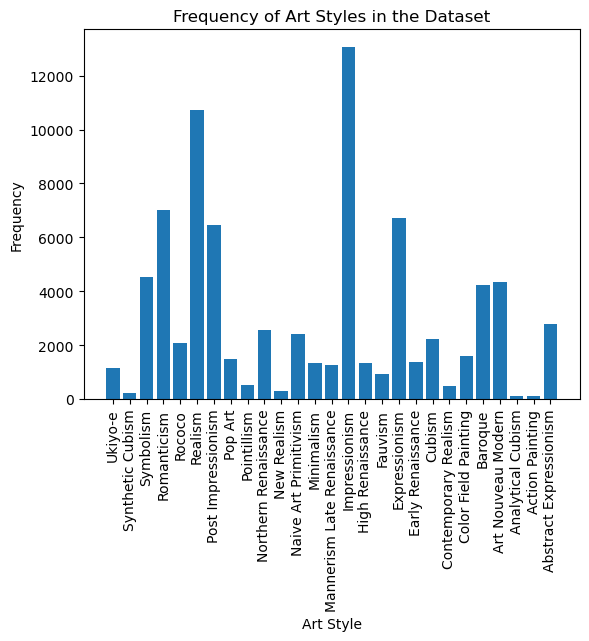

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(df['Art Style'], df['Frequency'])
plt.xticks(rotation=90)
plt.xlabel('Art Style')
plt.ylabel('Frequency')
plt.title('Frequency of Art Styles in the Dataset')
plt.show()